# Импорт данных и препроцессинг

In [161]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [162]:
# Load the data
df_train =pd.read_csv('train.csv', index_col='Id')
df_test = pd.read_csv('test.csv', index_col='Id')

In [163]:
def table_info(df):
    '''
    функция выводит первоначальную статистику по df  
    '''
    display('Информация о данных:', df.info())
    display('Первые пять строк в Dataframe', df.sample(5))
    display('Описательную статистику', df.describe())
    display('Доля пропущенных значения',df.isna().mean().sort_values(ascending=False))
    display('Уникальные значения',df.nunique().sort_values(ascending=False))
    return df

In [164]:
pd.set_option('display.max_rows', None)
# table_info(df_train)

In [165]:
#проверим дубликаты'Количество дубликатов:', 
# df_train.duplicated().sum()

In [166]:
# len(df_train.columns)

In [167]:
# df_train.info()

# Очистка датасета

In [168]:
# Убираем столбцы с пропущенными значениями свыше 70% 
missing_percent = df_train.isnull().sum() / len(df_train)
missing_columns = missing_percent[missing_percent > 0.7].index

In [169]:
missing_columns

Index(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [172]:
# датафрейм с удаленными столбцами
marker = 'No_info'
df_train_new = df_train.drop(missing_columns, axis=1) 
# for col in missing_columns:
#   df_train_new[col] = df_train[col].fillna(marker)

In [173]:
df_train_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemodAdd 

In [174]:
# df_train_new.info()

In [175]:
# Числовые признаки
num_cols = ['LotArea','LotFrontage', 'MasVnrArea', 'BsmtFinSF1',
            'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
            'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'GarageArea', 'SalePrice'
]

# Категориальные признаки
cat_cols = ['Id', 'MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 
            'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 
            'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 
            'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 
            'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 
            'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 
            'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 
            'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 
            'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 
            'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 
            'GarageCars',  'GarageQual', 'GarageCond', 'PavedDrive','3SsnPorch',
            'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType','SaleCondition'
]

feature_cols = num_cols + cat_cols

target_cat = ['Id', 'MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 
              'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 
              'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
              'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 
              'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 
              'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'LowQualFinSF', 
              'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 
              'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 
              'GarageYrBlt', 'GarageFinish', 'GarageCars',  'GarageQual', 'GarageCond', 'PavedDrive',
              '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
              'SaleCondition', 'SalePrice'
]


target_col = 'SalePrice'

In [178]:
# получаем список столбцов где есть пропущенные значения
df_train_new.columns[df_train_new.isnull().any()]

Index(['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageQual', 'GarageCond'],
      dtype='object')

In [179]:
# df_train_new.LotFrontage[df_train_new.LotFrontage.isnull()]

In [180]:
# LotFrontage Линейные футы улицы, примыкающие к земельному участку 
# числовой NaN заеменим на median
LotFrontage_med = df_train_new.LotFrontage.median()
df_train_new.LotFrontage = df_train_new.LotFrontage.apply(lambda x: LotFrontage_med if pd.isnull(x) else x)

In [181]:
# проверка
# df_train_new.MasVnrType[df_train_new.MasVnrType.isnull()]

In [182]:
# MasVnrType Тип облицовки кирпичной кладкой
# числовой NaN заеменим на 0
df_train_new.MasVnrType[df_train.MasVnrType == 0]
df_train_new.MasVnrType = df_train_new.MasVnrType.apply(lambda x: 0 if pd.isnull(x) else x)

In [183]:
# проверка
# df_train_new.MasVnrArea[df_train_new.MasVnrArea.isnull()]

In [184]:
# MasVnrArea Площадь облицовки из кирпича в квадратных футах
# числовой NaN заеменим на 0
df_train_new.MasVnrArea[df_train.MasVnrArea == 0]
df_train_new.MasVnrArea = df_train_new.MasVnrArea.apply(lambda x: 0 if pd.isnull(x) else x)

In [185]:
# проверка
# df_train_new.BsmtQual[df_train_new.BsmtQual.isnull()]
# df_train_new.BsmtQual.hist()

In [186]:
# BsmtQual Оценивает высоту подвала
# числовой NaN заеменим на marker
df_train_new.BsmtQual = df_train_new.BsmtQual.apply(lambda x: marker if pd.isnull(x) else x)

In [187]:
# проверка
# df_train_new.BsmtCond[df_train_new.BsmtCond.isnull()]
# df_train_new.BsmtCond.hist()

In [188]:
# BsmtQual Оценивает высоту подвала
# числовой NaN заеменим на marker
df_train_new.BsmtCond = df_train_new.BsmtCond.apply(lambda x: marker if pd.isnull(x) else x)

In [189]:
# проверка
# df_train_new.BsmtExposure[df_train_new.BsmtExposure.isnull()]
# df_train_new.BsmtExposure.hist()

In [190]:
# BsmtExposure Относится к наличию выхода или садового уровня стен
# числовой NaN заеменим на marker
df_train_new.BsmtExposure = df_train_new.BsmtExposure.apply(lambda x: marker if pd.isnull(x) else x)

In [191]:
# проверка
# df_train_new.BsmtFinType1[df_train_new.BsmtFinType1.isnull()]
# df_train_new.BsmtFinType1.hist()

In [192]:
# BsmtFinType1 Оценка готовой площади подвала
# числовой NaN заеменим на marker
df_train_new.BsmtFinType1 = df_train_new.BsmtFinType1.apply(lambda x: marker if pd.isnull(x) else x)

In [193]:
# проверка
# df_train_new.BsmtFinType2[df_train_new.BsmtFinType2.isnull()]
# df_train_new.BsmtFinType2.hist()

In [194]:
# BsmtFinType1 Оценка готовой площади подвала
# числовой NaN заеменим на marker
df_train_new.BsmtFinType2 = df_train_new.BsmtFinType2.apply(lambda x: marker if pd.isnull(x) else x)

In [195]:
# проверка
# df_train_new.Electrical[df_train_new.Electrical.isnull()]
# df_train_new.Electrical.hist()

In [196]:
# Electrical Электрическая система
# числовой NaN заеменим на marker
df_train_new.Electrical = df_train_new.Electrical.apply(lambda x: marker if pd.isnull(x) else x)

In [197]:
# проверка
# df_train_new.FireplaceQu[df_train_new.FireplaceQu.isnull()]
# df_train_new.FireplaceQu.hist()

In [198]:
# FireplaceQu Качество камина
# числовой NaN заеменим на marker
df_train_new.FireplaceQu = df_train_new.FireplaceQu.apply(lambda x: marker if pd.isnull(x) else x)

In [199]:
# проверка
# df_train_new.GarageType[df_train_new.GarageType.isnull()]
# df_train_new.GarageType.hist()

In [200]:
# GarageType Расположение гаража
# числовой NaN заеменим на marker
df_train_new.GarageType = df_train_new.GarageType.apply(lambda x: marker if pd.isnull(x) else x)

In [201]:
# проверка
# df_train_new.GarageYrBlt[df_train_new.GarageYrBlt.isnull()]
# df_train_new.GarageYrBlt.hist()

In [202]:
# GarageYrBlt Год постройки гаража
# числовой NaN заеменим на marker
df_train_new.GarageYrBlt = df_train_new.GarageYrBlt.apply(lambda x: 0 if pd.isnull(x) else x)

In [203]:
# проверка
# df_train_new.GarageFinish[df_train_new.GarageFinish.isnull()]
# df_train_new.GarageFinish.hist()

In [204]:
# GarageFinish Внутренняя отделка гаража
# числовой NaN заеменим на marker
df_train_new.GarageFinish = df_train_new.GarageFinish.apply(lambda x: marker if pd.isnull(x) else x)

In [205]:
# проверка
# df_train_new.GarageQual[df_train_new.GarageQual.isnull()]
# df_train_new.GarageQual.hist()

In [206]:
# GarageQual Качество гаража
# числовой NaN заеменим на marker
df_train_new.GarageQual = df_train_new.GarageQual.apply(lambda x: marker if pd.isnull(x) else x)

In [207]:
# проверка
# df_train_new.GarageCond[df_train_new.GarageCond.isnull()]
# df_train_new.GarageCond.hist()

In [208]:
# GarageCond Качество гаража
# числовой NaN заеменим на marker
df_train_new.GarageCond = df_train_new.GarageCond.apply(lambda x: marker if pd.isnull(x) else x)

# Визуализация

In [209]:
import plotly.express as px
fig = px.scatter_matrix(df_train_new[num_cols])
fig.update_layout(
    title='Data set',
    width=1600,
    height=1600,
)

fig.show()

In [210]:
# построим графики
import seaborn as sns
#sns.pairplot(train[num_cols])
#корреляция Пирсона
df_train_new[num_cols].corr().style.background_gradient()

,LotArea,LotFrontage,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,GarageArea,SalePrice
LotArea,1.000000,0.304522,0.103321,0.214103,-0.002618,0.260833,0.299475,0.050986,0.263116,0.171698,0.084774,-0.018340,0.180403,0.263843
LotFrontage,0.304522,1.000000,0.178469,0.214367,0.124098,0.363472,0.413773,0.072388,0.368007,0.075542,0.137014,0.010287,0.323511,0.334771
MasVnrArea,0.103321,0.178469,1.000000,0.261256,0.113862,0.360067,0.339850,0.173800,0.388052,0.159991,0.122528,-0.109907,0.370884,0.472614
BsmtFinSF1,0.214103,0.214367,0.261256,1.000000,-0.495251,0.522396,0.445863,-0.137079,0.208171,0.204306,0.111761,-0.102303,0.296970,0.386420
BsmtUnfSF,-0.002618,0.124098,0.113862,-0.495251,1.000000,0.415360,0.317987,0.004469,0.240257,-0.005316,0.129005,-0.002538,0.183303,0.214479
TotalBsmtSF,0.260833,0.363472,0.360067,0.522396,0.415360,1.000000,0.819530,-0.174512,0.454868,0.232019,0.247264,-0.095478,0.486665,0.613581
1stFlrSF,0.299475,0.413773,0.339850,0.445863,0.317987,0.819530,1.000000,-0.202646,0.566024,0.235459,0.211671,-0.065292,0.489782,0.605852
2ndFlrSF,0.050986,0.072388,0.173800,-0.137079,0.004469,-0.174512,-0.202646,1.000000,0.687501,0.092165,0.208026,0.061989,0.138347,0.319334
GrLivArea,0.263116,0.368007,0.388052,0.208171,0.240257,0.454868,0.566024,0.687501,1.000000,0.247433,0.330224,0.009113,0.468997,0.708624
WoodDeckSF,0.171698,0.075542,0.159991,0.204306,-0.005316,0.232019,0.235459,0.092165,0.247433,1.000000,0.058661,-0.125989,0.224666,0.324413


# Распределение цены квартир 

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


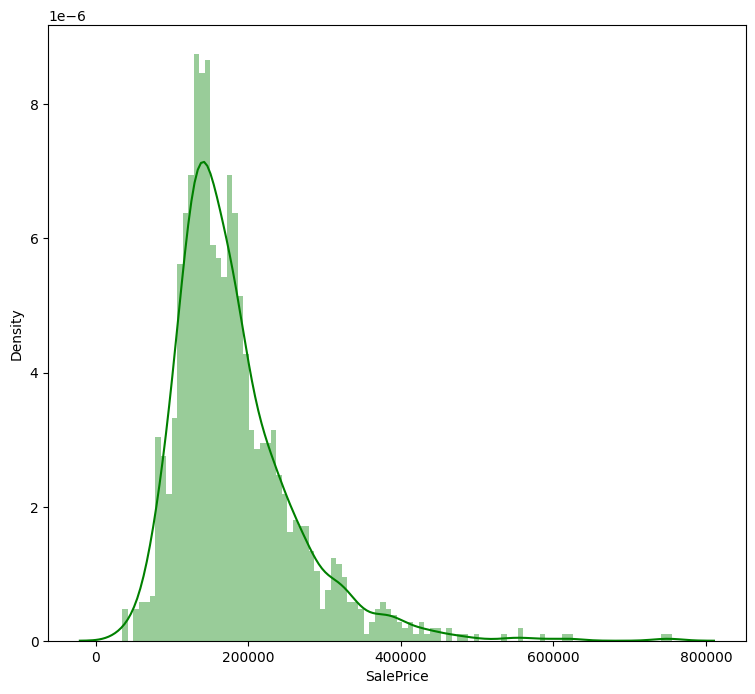

In [213]:
print(df_train_new['SalePrice'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df_train_new['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});